In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/last-9-assessment/assignment_data.csv
/kaggle/input/last-9-assessment/Data Scientist Assignment Advanced.pdf


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error

import numpy as np
from scipy import stats

In [3]:
#reading the data set
data = pd.read_csv('/kaggle/input/last-9-assessment/assignment_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        10080 non-null  int64
 1   variable  10080 non-null  int64
dtypes: int64(2)
memory usage: 157.6 KB


In [4]:
data.head()

,ID,variable
0,1,0
1,2,0
2,3,2
3,4,0
4,5,0


In [5]:
# samples for 6 days when every event is occuring at 60 seconds or 1 minute 
tr_no_samples = 6*24*60
tr_no_samples

8640

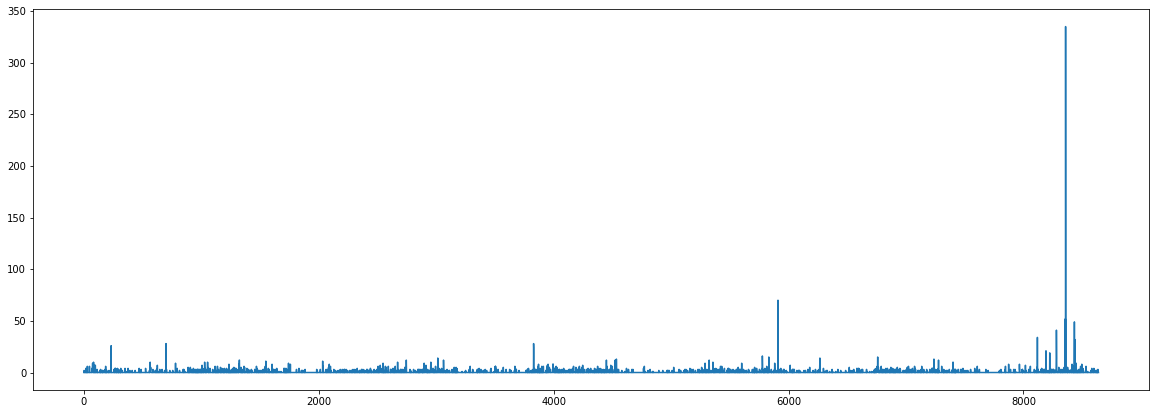

In [6]:
# train samples plot
plt.figure(figsize=(20, 7))
plt.plot(data.variable[0:tr_no_samples])

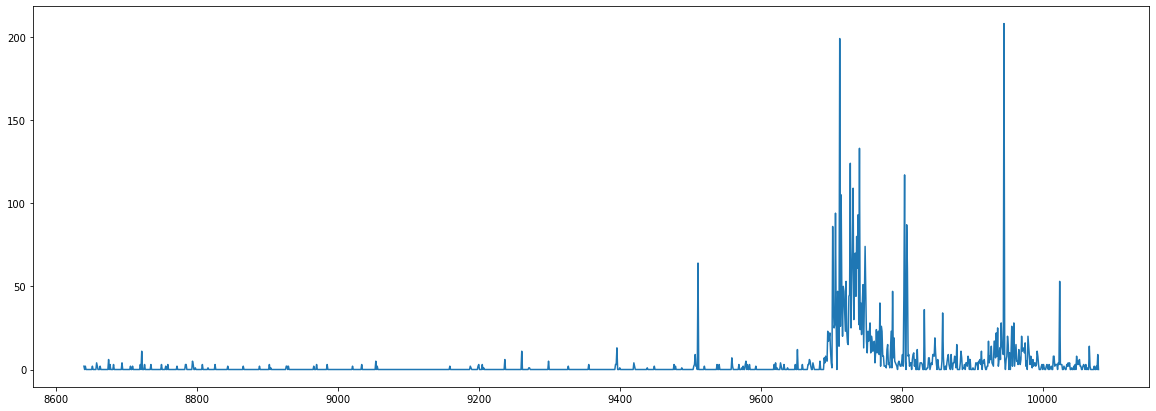

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(data.variable[tr_no_samples:])

In [8]:
# key information for detection of oulier is we have some traing data - un supervised data set
# approach to handle outliers or Anomaly  detections
# Statistics approach - Normal distribution - 3 Z on both sides of mean in normal plot
# A Domain expert guidance based anomoly detection
# Hypothesis test based approach based on train sample - estimation on test sample

# one class classification approach - for time series data
#

# Moving window based approach

# Train and test data spliting
#### In time series Split happens in a sequence manner unlike shuffling in non time series data samples

In [9]:
trn_dat = data[['variable']][0:tr_no_samples]
trn_dat.head()

,variable
0,0
1,0
2,2
3,0
4,0


In [10]:
tst_dat = data[['variable']][tr_no_samples:]
tst_dat.head()

,variable
8640,2
8641,0
8642,2
8643,0
8644,0


In [11]:
# copy of train and test are created to append the final results from each prediction algorithm 
data_trn = trn_dat.copy()
data_tst = tst_dat.copy()

# Approach #1

## Box Plot method

### here the majority of the data is 0 values - very hight frequency
### so the box plot method considers any values other than 0 as an outlier

### may not  be good approach for this data set

In [12]:
trn_dat.describe()

,variable
count,8640.000000
mean,0.561921
std,4.229673
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,335.000000


In [13]:
def box_plot_outlier_detection(data):
    
    # splitting to train and test data set
    tst_dat = data[['variable']][tr_no_samples:]
    trn_dat = data[['variable']][0:tr_no_samples]

    # Box plot boundries used for calculating of outlier sin the data set

    # IQR - inter quatile range
    IQR = (trn_dat.describe().loc['25%'] - trn_dat.describe().loc['75%'])
    
    #lower boundry
    lb = trn_dat.describe().loc['25%'] - 1.5*IQR
    
    #upper boundry
    ub = trn_dat.describe().loc['75%'] + 1.5*IQR
    
    #median of the traing data set
    median = trn_dat.describe().loc['50%']

    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.title("Train-data // box_plot_outlier_detection")
    plt.plot(trn_dat, label="Train values")

    cnt = 0
    anmly_index = []
    anmly_value = []
    Box_plt_rslt = []
    for i in list(trn_dat['variable'].values):

        if i > ub.values[0] or i < lb.values[0]:
            anmly_index.append(cnt)
            anmly_value.append(i)
            Box_plt_rslt.append('Yes')
        else:
            Box_plt_rslt.append('No')
            
        cnt = cnt+1
    
    cnt_trn = list(np.arange(0,trn_dat.shape[0]))
    med_trn = list(np.repeat(median,trn_dat.shape[0]))
    ub_trn  = list(np.repeat(ub.values[0],trn_dat.shape[0]))
    lb_trn  = list(np.repeat(lb.values[0],trn_dat.shape[0]))
    
    
    plt.plot(cnt_trn,med_trn, "r--")
    plt.plot(cnt_trn,ub_trn, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_trn,lb_trn, "r--")
    
    plt.plot(anmly_index,anmly_value, "ro", markersize=1)
    plt.xlabel('Train // Event -Index')
    plt.ylabel('Train // Event recorded values')
    plt.legend(loc="upper left")
    plt.grid(True)
    
    
    
        
    tst_dat.index = np.arange(0,tst_dat.shape[0])
    # plotting test results
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.title("Test-data // box_plot_outlier_detection")
    plt.plot(tst_dat, label="Test values")
    
    test_anml_index = []
    test_anml_value = []
    Box_plt_rslt_tst = []
    for cnt,i in enumerate(list(tst_dat['variable'].values)):

        if i > ub.values[0] or i < lb.values[0]:
            test_anml_index.append(cnt)
            test_anml_value.append(i)
            Box_plt_rslt_tst.append('Yes')
        else:
            Box_plt_rslt_tst.append('No')
    
    cnt_tst = list(np.arange(0,tst_dat.shape[0]))
    med_tst = list(np.repeat(median,tst_dat.shape[0]))
    ub_tst  = list(np.repeat(ub.values[0],tst_dat.shape[0]))
    lb_tst  = list(np.repeat(lb.values[0],tst_dat.shape[0]))
    
    plt.plot(cnt_tst,med_tst, "r--")
    plt.plot(cnt_tst,ub_tst, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_tst,lb_tst, "r--")
    
    plt.plot(test_anml_index,test_anml_value, "ro", markersize=2)
    plt.xlabel('Test // Event -Index')
    plt.ylabel('Test // Event recorded values')
    
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return Box_plt_rslt, Box_plt_rslt_tst

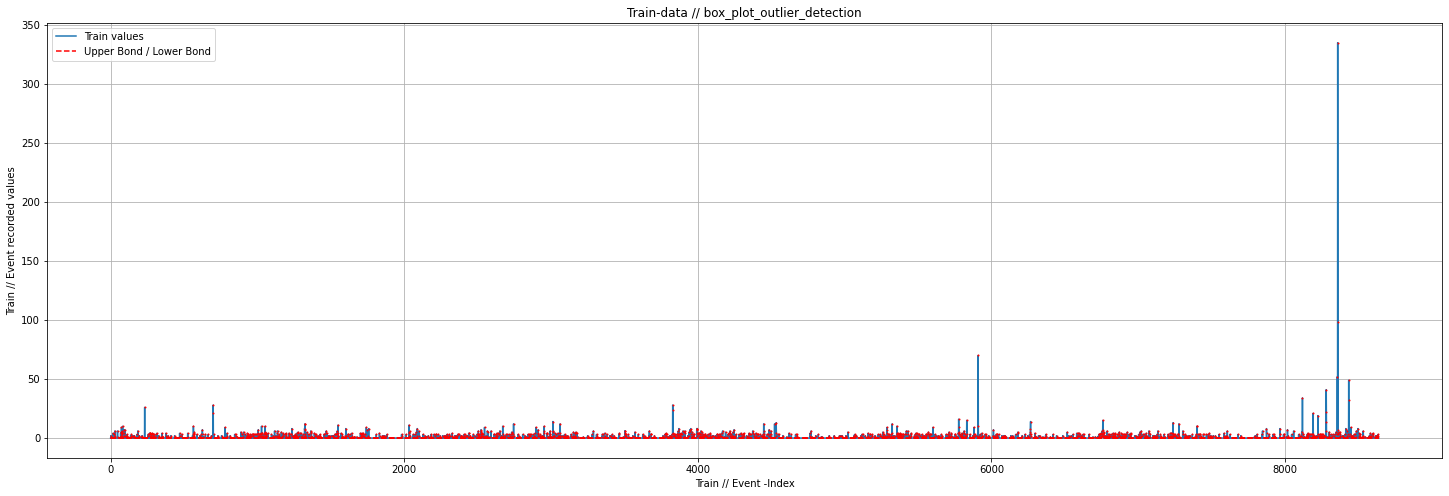

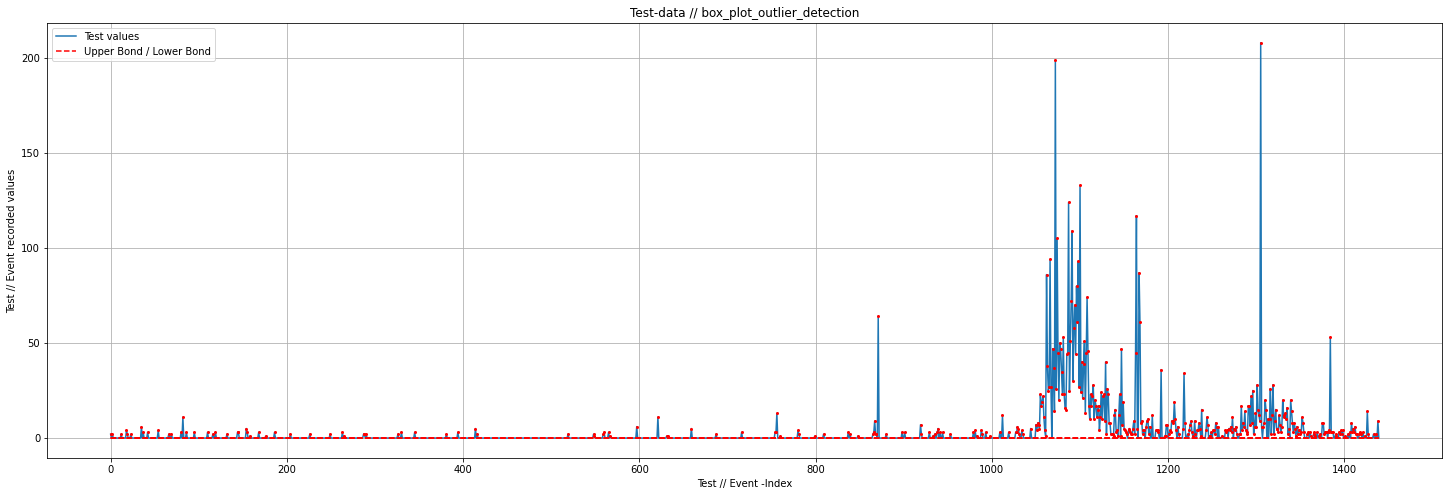

In [14]:
box_trn,box_tst = box_plot_outlier_detection(data)

In [15]:
# result updation on to test and train data
data_trn['Box_rslt'] = box_trn
data_tst['Box_rslt'] = box_tst

<AxesSubplot:xlabel='variable'>

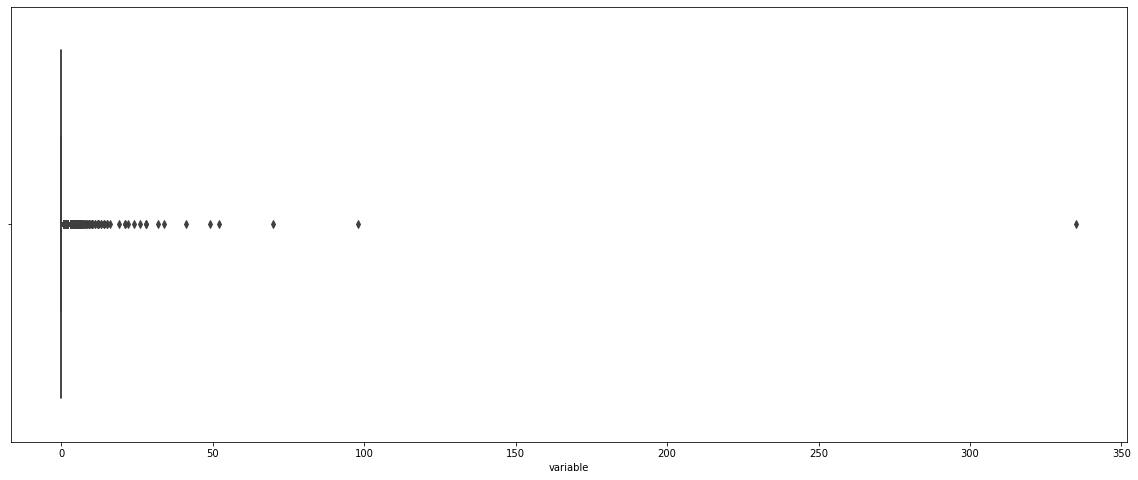

In [16]:
# box plot for training data
plt.figure(figsize=(20,8))
sns.boxplot(x =trn_dat.variable)

<AxesSubplot:xlabel='variable'>

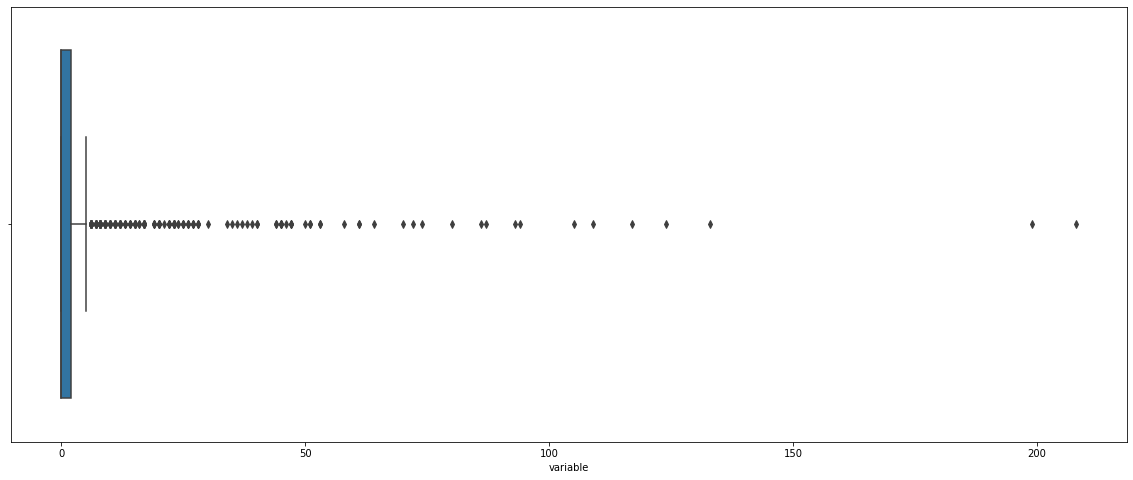

In [17]:
# box plot for testing data
plt.figure(figsize=(20,8))
sns.boxplot(x =tst_dat.variable)

# Approach #2

# Statistics based approached

In [18]:
# splitting to train and test data set
tst_dat = data[['variable']][tr_no_samples:]
trn_dat = data[['variable']][0:tr_no_samples]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

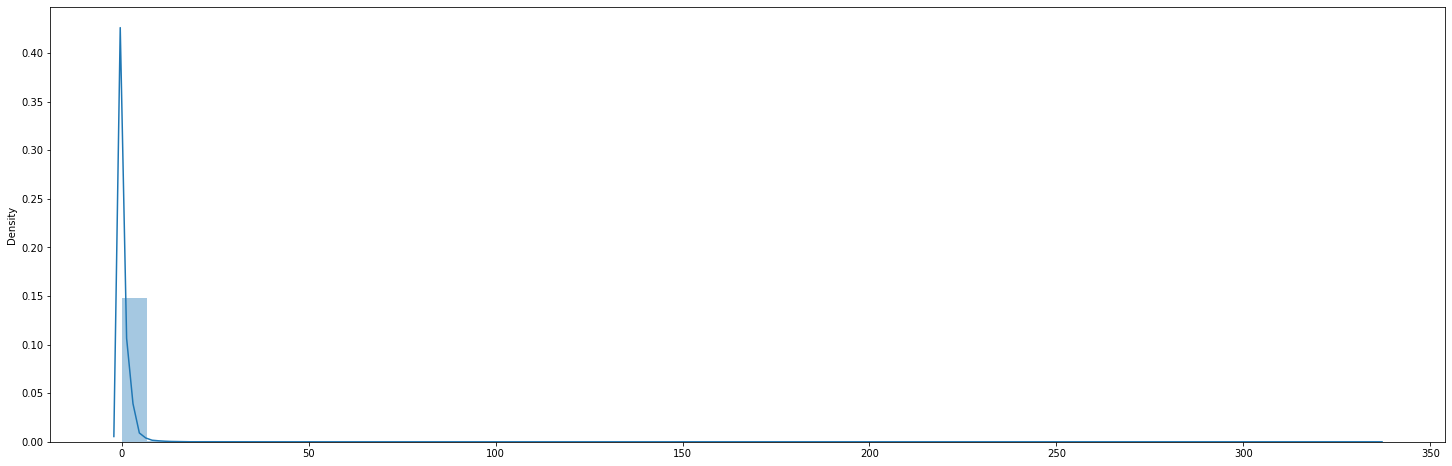

In [19]:
plt.figure(figsize=(25,8))
sns.distplot(trn_dat)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='variable', ylabel='count'>

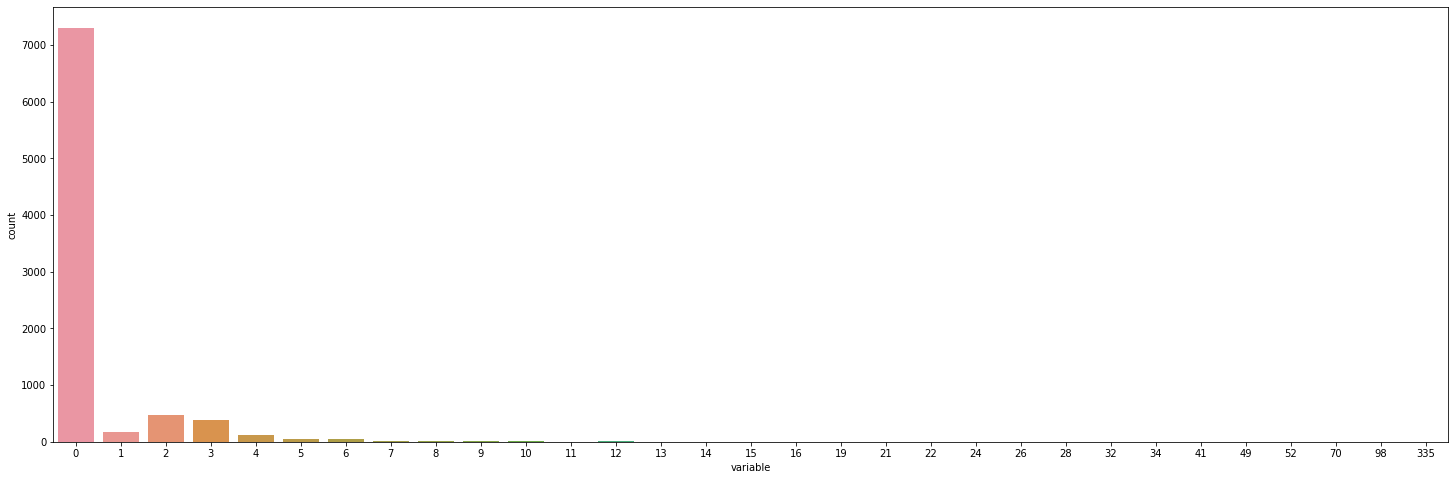

In [20]:
plt.figure(figsize=(25,8))
sns.countplot(trn_dat['variable'])

## Statistics - by manual obeservations

### choose a probability range like 98% and look the value occurrence in this range

### 98.3% probability obersavtion says that - the values will be in the range of 0 to 6

### choice of probability is Data Scientic choice here - we considere 98.0+% probability 

### by considering the obesrvation from trainnning data we are trying to predict the upcoming samples bevaiour as outlier/anamoly or normal values

In [21]:
# function defined with choice of probability selection
def Simple_probability_outlier_detection(data, probability):
    
    # splitting to train and test data set
    tst_dat = data[['variable']][tr_no_samples:]
    trn_dat = data[['variable']][0:tr_no_samples]
    
    # events in ascending order for this case data set only....use only in this data set
    trn_asc_ord = trn_dat[['variable']].sort_values(by='variable',axis=0,ascending=True)
    
    # boundry limit calculation 

    for idx,i in enumerate(list(trn_asc_ord['variable'].value_counts().index)):
    # probability calculation for the event happening (include case)
    # like probability of event happening of (0,1,2,3,...) Include  case
        prob = trn_asc_ord['variable'].value_counts()[0:idx].sum()/trn_asc_ord['variable'].shape[0]

        if prob >= probability:
            ub = max(trn_asc_ord['variable'].value_counts()[0:idx].index[0:])
            lb = min(trn_asc_ord['variable'].value_counts()[0:idx].index[0:])
            print(' the obtained probability : {} \n the probability  criteria given : {}'.format(prob, probability))
            print('The upper bond limit {} \n the lower limit {}'.format(ub,lb))
            
            break
    
    
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.plot(trn_dat, label="Train values")

    # gathering anamoly index and values in the train data set
    cnt = 0
    anmly_index = []
    anmly_value = []
    anmly_rslt = []
    for i in list(trn_dat['variable'].values):

        if i > ub or i < lb:
            anmly_index.append(cnt)
            anmly_value.append(i)
            anmly_rslt.append('Yes')
        else:
            anmly_rslt.append('No')
            
        cnt = cnt+1

    
    cnt_trn = list(np.arange(0,trn_dat.shape[0]))
    ub_trn  = list(np.repeat(ub,trn_dat.shape[0]))
    lb_trn  = list(np.repeat(lb,trn_dat.shape[0]))
    
    
    plt.plot(cnt_trn,ub_trn, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_trn,lb_trn, "r--")
    
    plt.plot(anmly_index,anmly_value, "ro", markersize=1)
    
    plt.xlabel('Train // Event -Index')
    plt.ylabel('Train // Event recorded values')
    plt.title("Train-data // Simple_probability_outlier_detection_probability:--{}".format(probability))
    plt.legend(loc="upper left")
    plt.grid(True)
    
    
    # handling test data
    tst_dat.index = np.arange(0,tst_dat.shape[0])
    # plotting test results
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.plot(tst_dat, label="Test values")
    
    # gathering anamoly index and values in the test data set
    test_anml_index = []
    test_anml_value = []
    anmly_rslt_tst = []
    for cnt,i in enumerate(list(tst_dat['variable'].values)):

        if i > ub or i < lb:
            test_anml_index.append(cnt)
            test_anml_value.append(i)
            anmly_rslt_tst.append('Yes')
        else:
            anmly_rslt_tst.append('No')
    
    #preparing to plot the anomaly in the test data
    cnt_tst = list(np.arange(0,tst_dat.shape[0]))
    
    ub_tst  = list(np.repeat(ub,tst_dat.shape[0]))
    lb_tst  = list(np.repeat(lb,tst_dat.shape[0]))
    

    plt.plot(cnt_tst,ub_tst, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_tst,lb_tst, "r--")
    
    plt.plot(test_anml_index,test_anml_value, "ro", markersize=2)
    plt.xlabel('Test // Event -Index')
    plt.ylabel('Test // Event recorded values')
    plt.title("Test-data // Simple_probability_outlier_detection_probability:--{}".format(probability))
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return anmly_rslt, anmly_rslt_tst

In [22]:
## the following code shows the outlier based out of desired probability chosen by the domain experts 
# more of a human invovement and domine expertise knowledge is required to identify the boundries

 the obtained probability : 0.9960648148148148 
 the probability  criteria given : 0.995
The upper bond limit 10 
 the lower limit 0


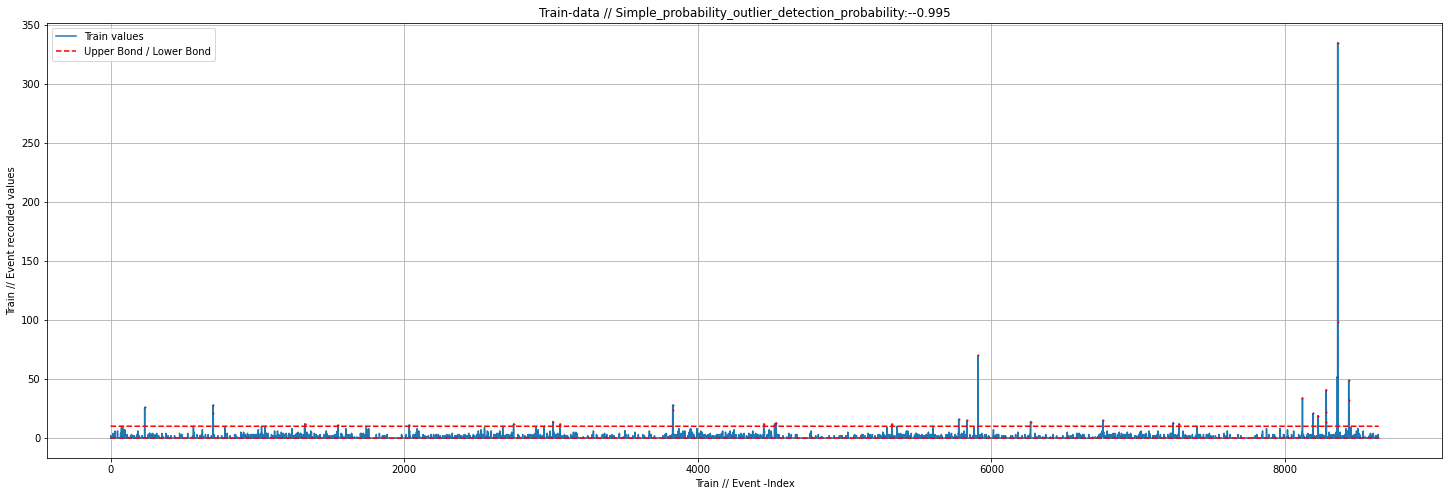

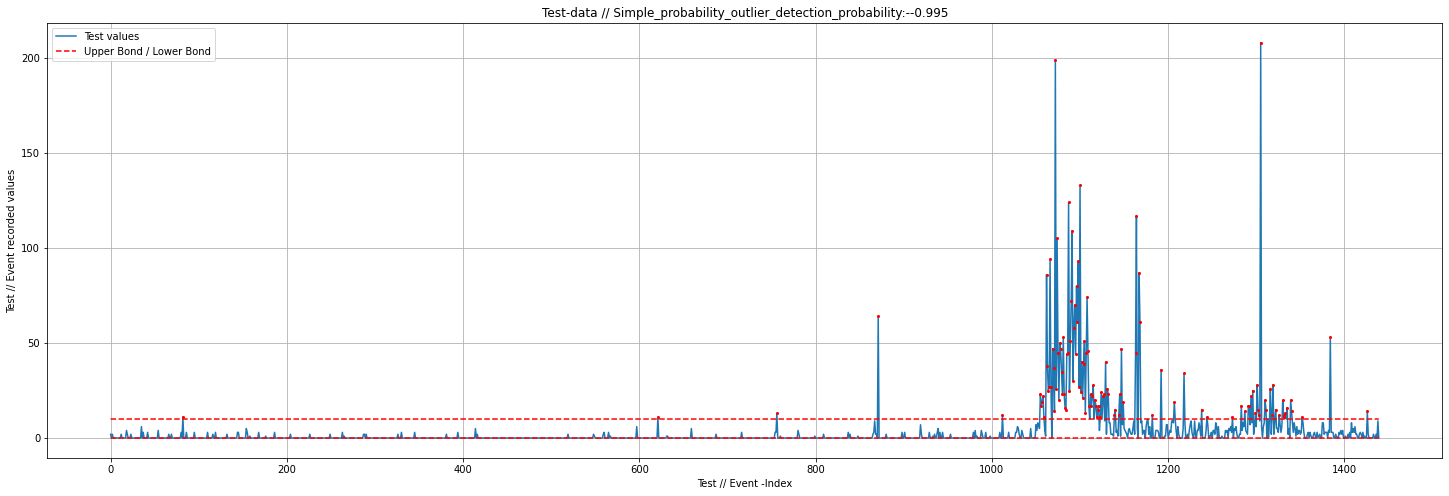

In [23]:
smp_trn, smp_tst = Simple_probability_outlier_detection(data, 0.995)

In [24]:
# result updation on to test and train data
data_trn['Sim_Prob_rslt'] = smp_trn
data_tst['Sim_Prob_rslt'] = smp_tst


# approach #3
# Statistical Z value based approach

### just normalise the train data and any values out of 3Z values on bothe side is considered to be ouliers 

#### mean +/- 3*Z can be used for outlier detection

#### We expect the test or upcoming values in the range with refferencing to train data

#### so for outlier boundaries detection we only consider train data for the calculation of Z values

In [25]:
def std_3_deviation_from_mean(data):
    
    # splitting to train and test data set
    tst_dat = data[['variable']][tr_no_samples:]
    trn_dat = data[['variable']][0:tr_no_samples]
    
    # creating upper/lower boundy limits 
    ub = (trn_dat.describe().loc['mean'] + 3*trn_dat.describe().loc['std']).values[0]
    lb = (trn_dat.describe().loc['mean'] - 3*trn_dat.describe().loc['std']).values[0]
    
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.plot(trn_dat, label="Train values")

    # gathering anamoly index and values in the train data set
    cnt = 0
    anmly_index = []
    anmly_value = []
    z_trn = []
    for i in list(trn_dat['variable'].values):

        if i > ub or i < lb:
            anmly_index.append(cnt)
            anmly_value.append(i)
            z_trn.append('Yes')
        else:
            z_trn.append('No')
            
        cnt = cnt+1

    
    cnt_trn = list(np.arange(0,trn_dat.shape[0]))

    ub_trn  = list(np.repeat(ub,trn_dat.shape[0]))
    lb_trn  = list(np.repeat(lb,trn_dat.shape[0]))
    
    
    plt.plot(cnt_trn,ub_trn, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_trn,lb_trn, "r--")
    
    plt.plot(anmly_index,anmly_value, "ro", markersize=5)
    
    plt.xlabel('X_trn_index')
    plt.ylabel('Train Event value recorded')
    plt.title("Train-data // std_3_deviation_from_mean")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    
    # handling test data
    tst_dat.index = np.arange(0,tst_dat.shape[0])
    # plotting test results
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.plot(tst_dat, label="Test values")

    
    # gathering anamoly index and values in the test data set
    test_anml_index = []
    test_anml_value = []
    z_trn_tst = []
    for cnt,i in enumerate(list(tst_dat['variable'].values)):

        if i > ub or i < lb:
            test_anml_index.append(cnt)
            test_anml_value.append(i)
            z_trn_tst.append('Yes')
        else:
            z_trn_tst.append('No')
    
    #preparing to plot the anomaly in the test data
    cnt_tst = list(np.arange(0,tst_dat.shape[0]))
    
    ub_tst  = list(np.repeat(ub,tst_dat.shape[0]))
    lb_tst  = list(np.repeat(lb,tst_dat.shape[0]))
    

    plt.plot(cnt_tst,ub_tst, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_tst,lb_tst, "r--")
    
    plt.plot(test_anml_index,test_anml_value, "ro", markersize=5)
    
    plt.xlabel('X_tst_index')
    plt.ylabel('Test Event value recorded')
    plt.title("Test-data // std_3_deviation_from_mean")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return z_trn, z_trn_tst

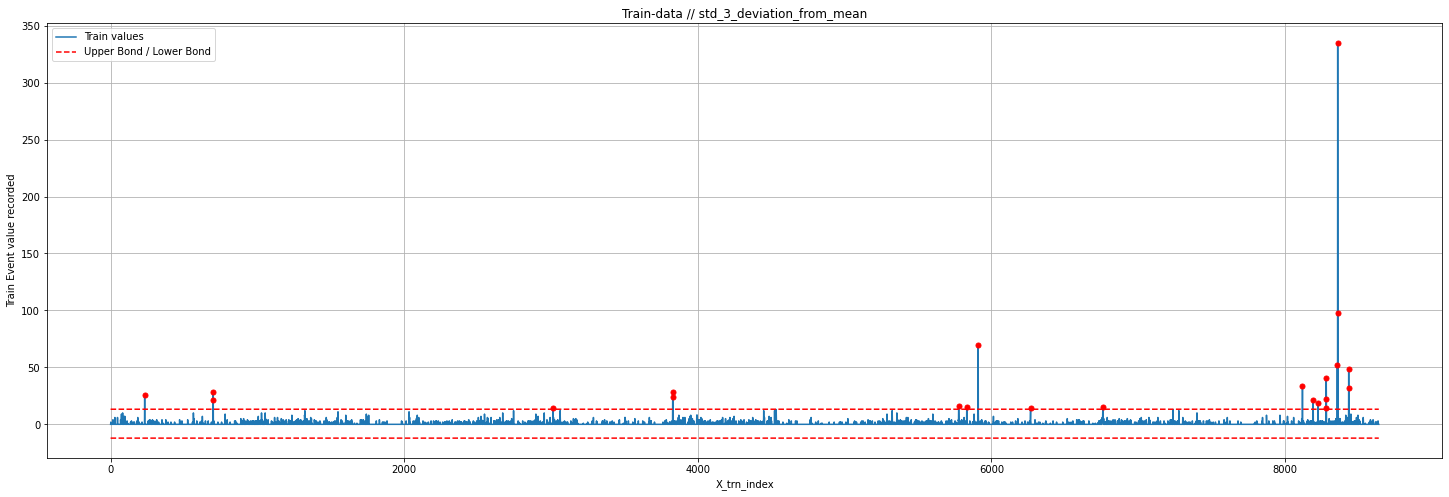

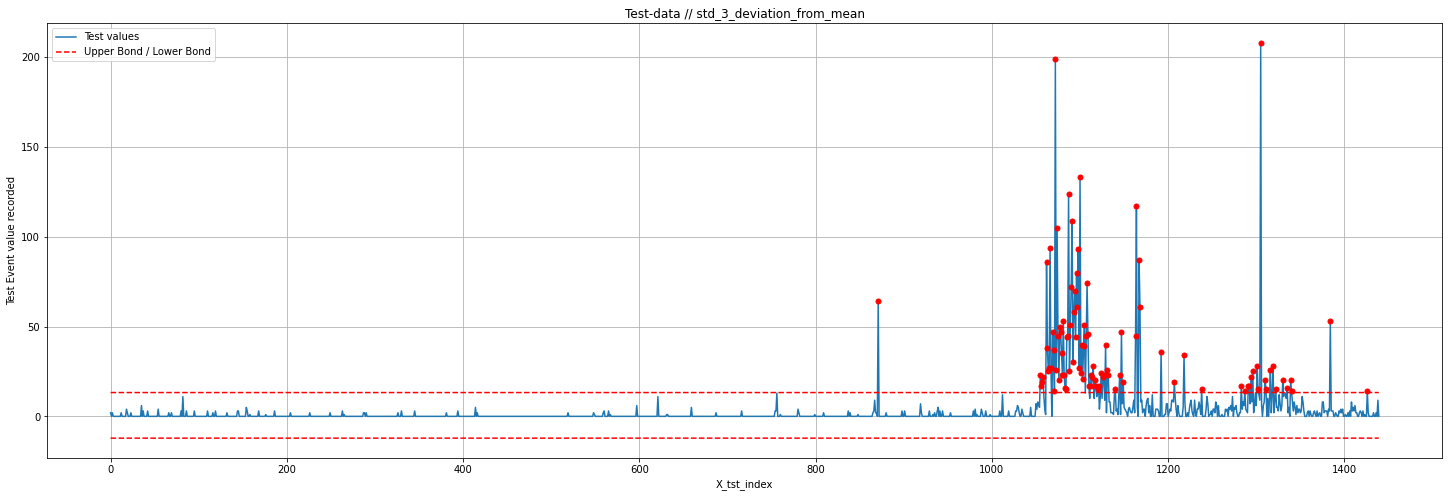

In [26]:
z_trn, z_trn_tst = std_3_deviation_from_mean(data)

In [27]:
# result updation on to test and train data
data_trn['3Z_rslt'] = z_trn
data_tst['3Z_rslt'] = z_trn_tst

# approach #4
# Confidence intervel based approach

### the entire given training data is considered for the confidence intervel calculation 

### give the significance level we get outlier based based on that values

In [28]:
def Significance_value_based_outlier_detection(data, alpha):
    
    # splitting to train and test data set
    tst_dat = data[['variable']][tr_no_samples:]
    trn_dat = data[['variable']][0:tr_no_samples]
    
    # alpha to critical
    n_sided = 2 # 2-sided test
    z_crit = stats.norm.ppf(1-alpha/n_sided)
    
    # creating upper/lower boundy limits 
    ub = (trn_dat.describe().loc['mean'] + z_crit*trn_dat.describe().loc['std']).values[0]
    lb = (trn_dat.describe().loc['mean'] - z_crit*trn_dat.describe().loc['std']).values[0]
    
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.title("Train-data // Confidence interval based approach alpha:{} & Z_critical value:{}".format(alpha,z_crit))
    plt.plot(trn_dat, label="Train values")

    # gathering anamoly index and values in the train data set
    cnt = 0
    anmly_index = []
    anmly_value = []
    cfi = []
    for i in list(trn_dat['variable'].values):

        if i > ub or i < lb:
            anmly_index.append(cnt)
            anmly_value.append(i)
            cfi.append('Yes')
        else:
            cfi.append('No')
            
        cnt = cnt+1

    
    cnt_trn = list(np.arange(0,trn_dat.shape[0]))

    ub_trn  = list(np.repeat(ub,trn_dat.shape[0]))
    lb_trn  = list(np.repeat(lb,trn_dat.shape[0]))
    
    
    plt.plot(cnt_trn,ub_trn, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_trn,lb_trn, "r--")
    
    plt.plot(anmly_index,anmly_value, "ro", markersize=5)
    
    plt.xlabel('X_trn_index')
    plt.ylabel('Train Event value recorded')
    plt.legend(loc="upper left")
    plt.grid(True)
    
    
    # handling test data
    tst_dat.index = np.arange(0,tst_dat.shape[0])
    # plotting test results
    # plotting the lower bound(lb), Upper bound(ub) and median values
    plt.figure(figsize=(25,8))
    plt.title("Test-data // Confidence interval based approach alpha:{} & Z_critical value:{}".format(alpha,z_crit))
    plt.plot(tst_dat, label="Test values")

    
    # gathering anamoly index and values in the test data set
    test_anml_index = []
    test_anml_value = []
    cfi_tst = []
    for cnt,i in enumerate(list(tst_dat['variable'].values)):

        if i > ub or i < lb:
            test_anml_index.append(cnt)
            test_anml_value.append(i)
            cfi_tst.append('Yes')
        else:
            cfi_tst.append('No')
            
    
    #preparing to plot the anomaly in the test data
    cnt_tst = list(np.arange(0,tst_dat.shape[0]))
    
    ub_tst  = list(np.repeat(ub,tst_dat.shape[0]))
    lb_tst  = list(np.repeat(lb,tst_dat.shape[0]))
    

    plt.plot(cnt_tst,ub_tst, "r--", label="Upper Bond / Lower Bond")
    plt.plot(cnt_tst,lb_tst, "r--")
    
    plt.plot(test_anml_index,test_anml_value, "ro", markersize=5)
    
    plt.xlabel('X_index')
    plt.ylabel('Test Event value recorded')
    
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return cfi, cfi_tst

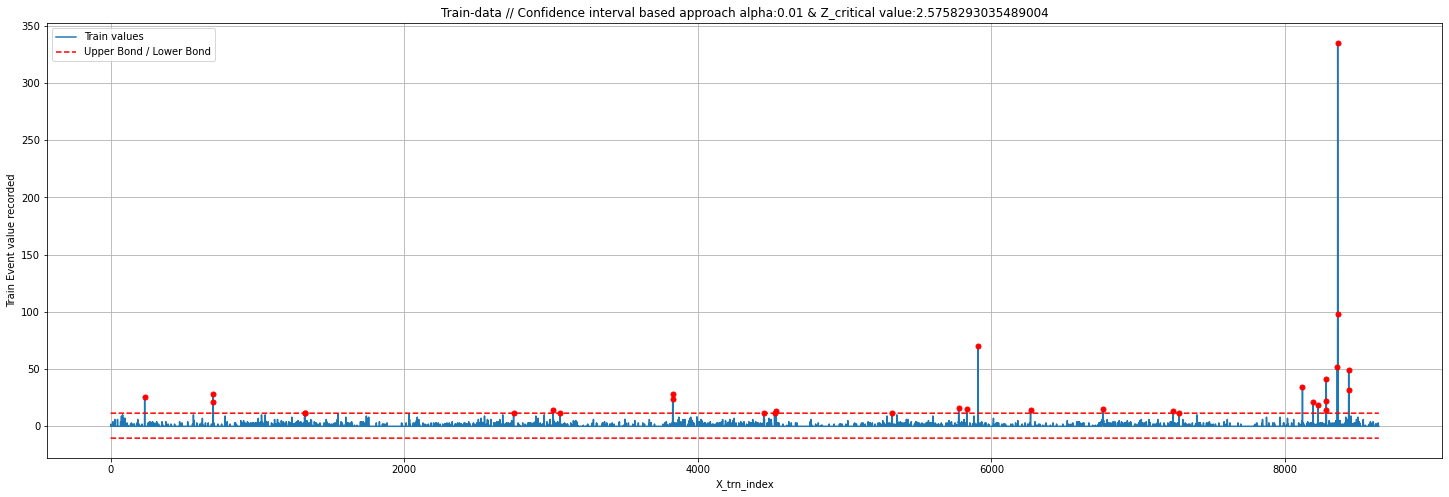

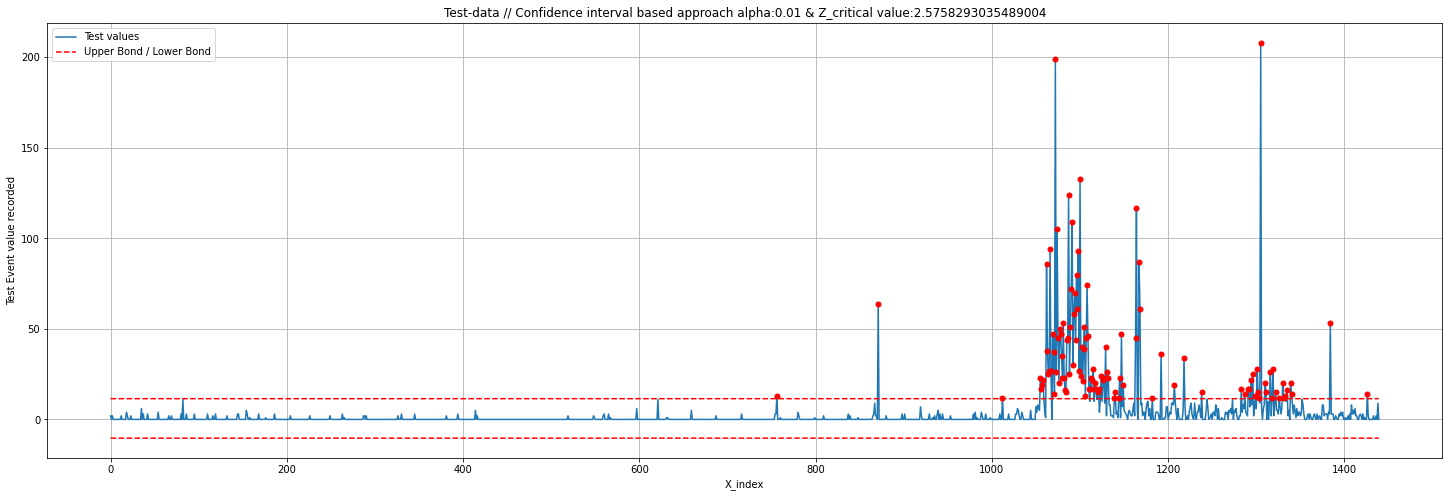

In [29]:
# 99% confidence interval
cfi, cfi_tst = Significance_value_based_outlier_detection(data, 0.01)

In [30]:
# result updation on to test and train data
data_trn['CFI_rslt'] = cfi
data_tst['CFI_rslt'] = cfi_tst

### All the above approaches have not considered or not giving any importence to change in local trend values
### The sliding window approach might help us to capture the localised trends movements
### Sliding window movements can be misleading also....useing it with the help of domain expertise is advisable

# approach #5
# Sliding window approach

### Considering the values as a time series values we give importence to the last few event occcured and 
### try to creat upper and lower boundaries based on last few important events...like last one hour, 4 hour, 12 hour, 18 hours and 1 day
### we make outlier prediction based on the last few important values

In [31]:
def plotMovingAverage(series, window, plot_intervals=False, alpha = 0.05, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    
    # alpha to critical
    n_sided = 2 # 2-sided test
    scale = stats.norm.ppf(1-alpha/n_sided)
    
    
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(25,8))
    plt.title("Moving average // window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=4)
    
   
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return anomalies

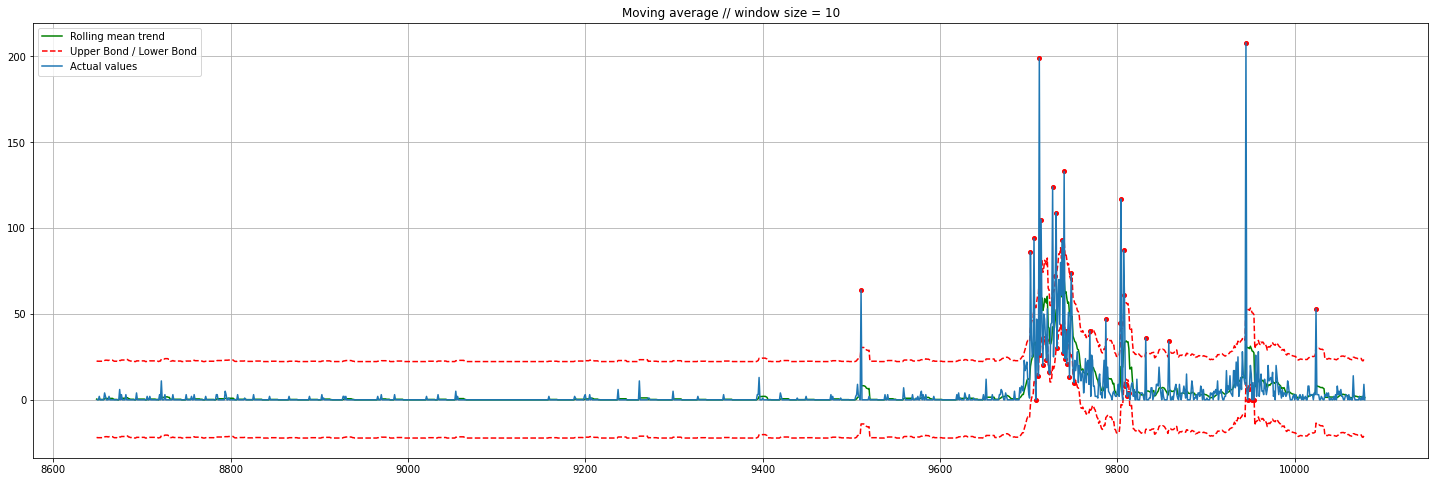

In [32]:
# for test data
anm_tst = plotMovingAverage(data[['variable']][tr_no_samples:], 10 ,plot_intervals=True,alpha = 0.05, plot_anomalies=True)

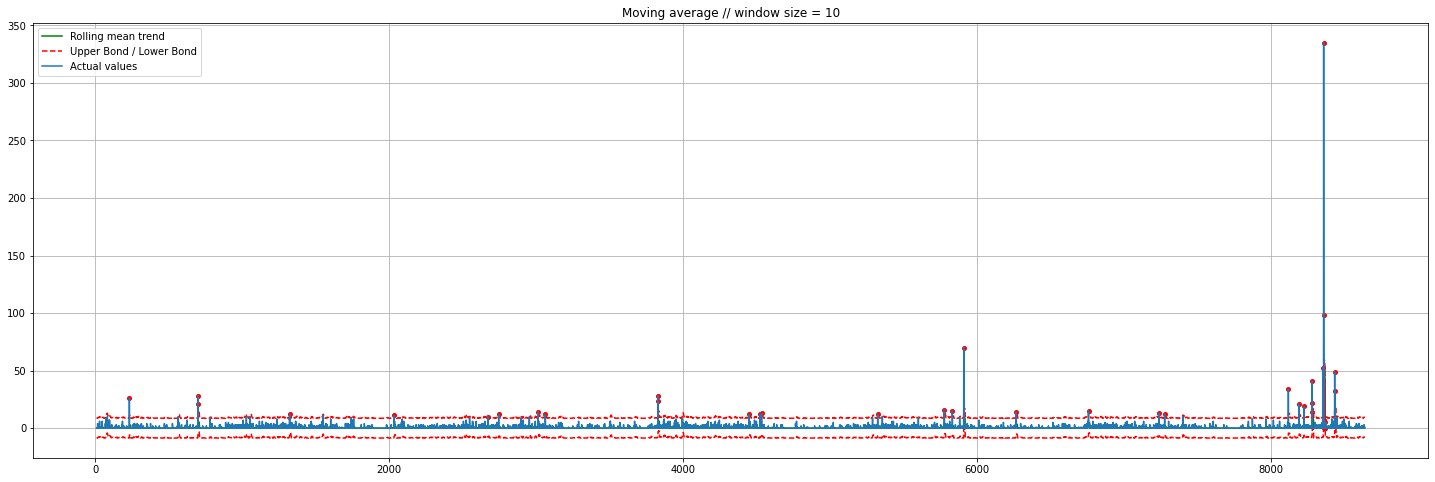

In [33]:
# Train data
anm_trn = plotMovingAverage(data[['variable']][0:tr_no_samples], 10 ,plot_intervals=True, alpha = 0.05, plot_anomalies=True)

In [34]:
# result updation on to test and train data
data_trn['mov_avg_rslt'] = anm_trn
data_tst['mov_avg_rslt'] = anm_tst

In [35]:
data_trn['mov_avg_rslt'].fillna('No',inplace=True)
data_tst['mov_avg_rslt'].fillna('No',inplace=True)

In [36]:
data_trn

,variable,Box_rslt,Sim_Prob_rslt,3Z_rslt,CFI_rslt,mov_avg_rslt
0,0,No,No,No,No,No
1,0,No,No,No,No,No
2,2,Yes,No,No,No,No
3,0,No,No,No,No,No
4,0,No,No,No,No,No
...,...,...,...,...,...,...
8635,0,No,No,No,No,No
8636,0,No,No,No,No,No
8637,0,No,No,No,No,No
8638,0,No,No,No,No,No


# Final Results form different algorithem

In [37]:
# final predictions from different algorithems are presented as 
data_tst

,variable,Box_rslt,Sim_Prob_rslt,3Z_rslt,CFI_rslt,mov_avg_rslt
8640,2,Yes,No,No,No,No
8641,0,No,No,No,No,No
8642,2,Yes,No,No,No,No
8643,0,No,No,No,No,No
8644,0,No,No,No,No,No
...,...,...,...,...,...,...
10075,0,No,No,No,No,No
10076,2,Yes,No,No,No,No
10077,0,No,No,No,No,No
10078,9,Yes,No,No,No,No
